In [1]:
from fastai.vision import *
from fastai.metrics import accuracy,error_rate

In [2]:
%matplotlib inline

In [15]:
path = untar_data(URLs.MNIST)

In [16]:
print(path)
path.ls()


/home/jupyter/.fastai/data/mnist_png


[PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [21]:
data = ImageDataBunch.from_folder(path,valid_pct=0.2,test='testing',size=32).normalize(imagenet_stats)


In [22]:
data

ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
5,5,5,5,5
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
9,5,8,4,2
Path: /home/jupyter/.fastai/data/mnist_png;

Test: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/mnist_png

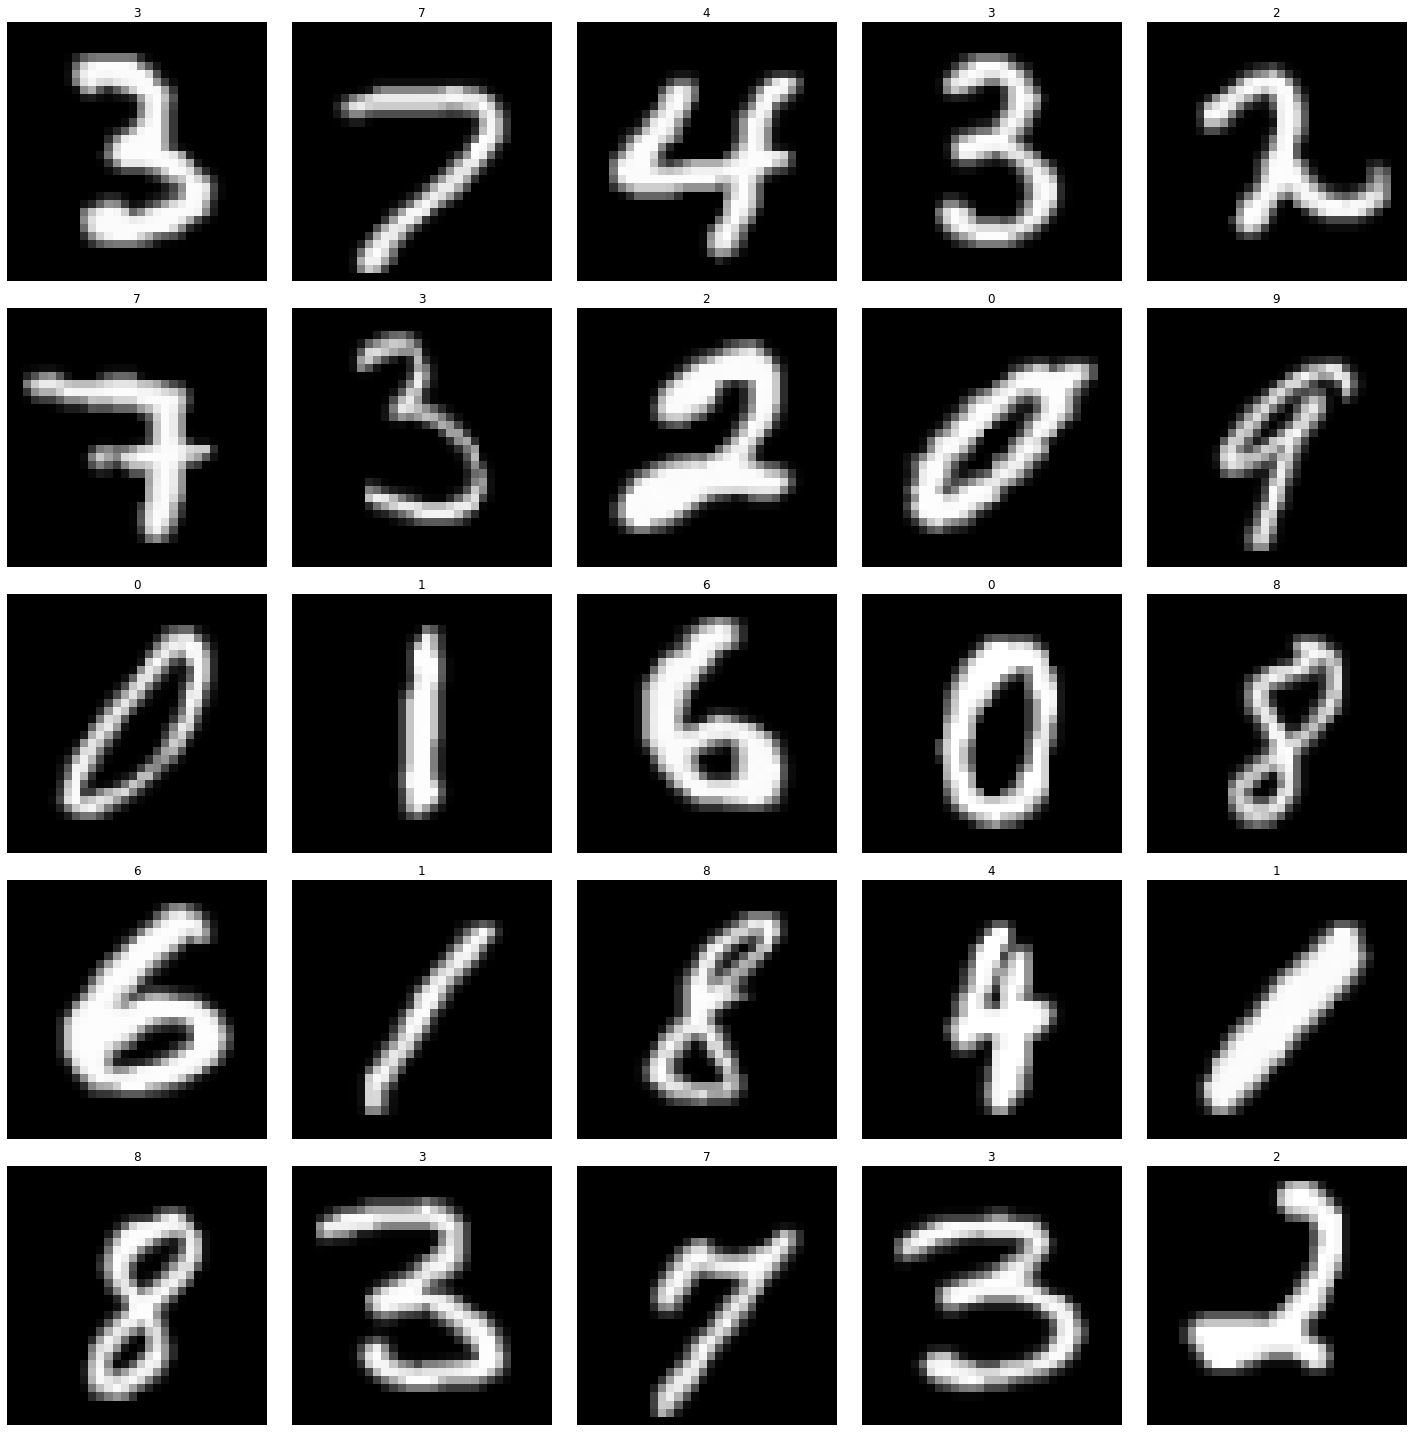

In [23]:
data.show_batch()

In [24]:
learn_error = cnn_learner(data,base_arch=models.resnet34,metrics=error_rate)

In [25]:
learn_error.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         0.606835    0.398021    0.124417    00:52     
1         0.269635    0.159535    0.047667    00:51     
2         0.176400    0.112885    0.033333    00:51     
3         0.132349    0.102217    0.031333    00:54     


In [27]:
inter_err = ClassificationInterpretation.from_learner(learn_error)

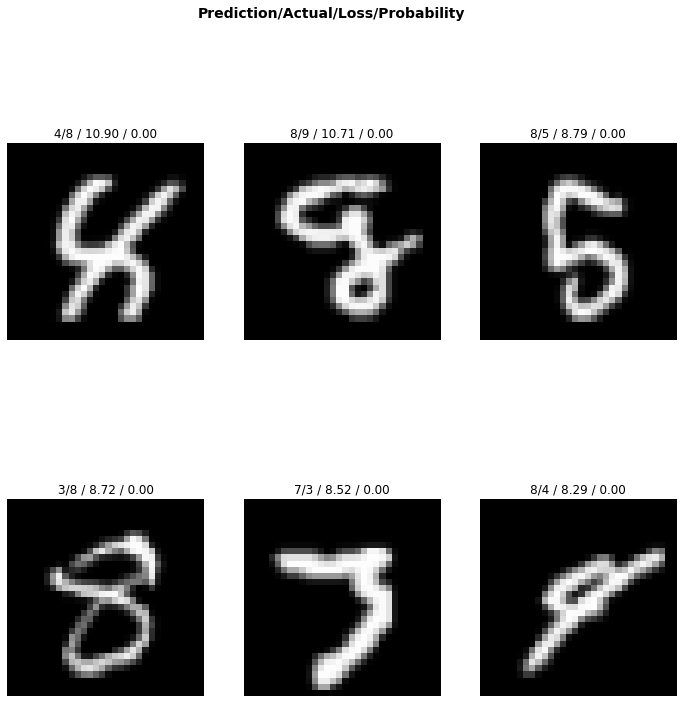

In [31]:
inter_err.plot_top_losses(6)

In [32]:
learn_acc = cnn_learner(data,models.resnet34,metrics=accuracy)

In [ ]:
learn_acc.fit_one_cycle(4)

epoch     train_loss  valid_loss  accuracy  time    
0         0.599267    0.398736    0.872167  00:50     
1         0.259782    0.165872    0.948250  00:53     
2         0.180914    0.113992    0.965083  00:51     
